# Introdução à Data Science e Machine Learning - Data ICMC-USP

## Prática Aula 04 - Técnicas de Data Science

Esse material foi desenvolvido pelo **Data**, grupo de extensão de aprendizado e ciência de dados compostos por alunos do Instituto de Ciências Matemáticas e de Computação da USP

Para saber mais sobre as atividades do Data entre no nosso site e nos siga e nossas redes sociais:
- [Site](http://data.icmc.usp.br/)
- [Twitter](https://twitter.com/data_icmc)
- [LinkedIn](https://www.linkedin.com/school/data-icmc/)
- [Facebook](https://www.facebook.com/dataICMC/)

Aproveite o material!

# Trabalhando com features numéricas

## Carregando as bibliotecas utilizadas

In [ ]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Importanto o dataset
iris = load_iris()

df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Divisão entre conjunto de treino e de teste

Realize a divisão entre conjunto de treino e conjunto de validação, utilizando a biblioteca sklearn.

Procure pelo método train_test_split da biblioteca.

In [ ]:
from sklearn.model_selection import train_test_split

X, y = df.drop("target", axis=1), df["target"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Escala dos dados numéricos

Como vimos na aula 04 do curso introdutório, em diversos modelos, as escalas de cada uma das features do nosso conjunto de dados são levadas em conta (o algoritmo KNN é um destes exemplos).

Para deixar mais claro, temos o seguinte exemplo: um conjunto de dados composto por duas features - número de propriedades, faturamento anual e uma coluna target.

O número de propriedades de uma pessoa não costuma passar das dezenas ou centenas, enquanto o faturamento anual pode variar centenas de milhares ou mais.

Neste caso, qualquer variação no número de propriedades é infima em relação a variação no faturamento anual. Logo estaríamos ponderando o faturamento, e quase que desconsiderando a primeira feature.

### Aplicando escalonamento
Aplique o escalonamento e a normalização nos dados do iris dataset.

Procure por MinMaxScaler e StandardScaler



In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_min_max = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_min_max = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_standardized = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_standardized = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
print(X_train_min_max.head())
X_train_min_max.shape

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.411765          0.409091           0.553571          0.500000
1           0.970588          0.454545           0.982143          0.833333
2           0.382353          0.454545           0.607143          0.583333
3           0.235294          0.681818           0.053571          0.041667
4           1.000000          0.363636           1.000000          0.791667


(100, 4)

In [ ]:
X_train_standardized.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.138356,-0.265508,0.222291,0.108949
1,2.147526,-0.026312,1.611608,1.184993
2,-0.258666,-0.026312,0.395955,0.377960
3,-0.860214,1.169672,-1.398579,-1.370611
4,2.267836,-0.504705,1.669496,1.050488


## Utilizando KNN

Verifique os resultados obtidos utilizando um conjunto de dados escalonados e outro normalizados, comparando seus resultados.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

clf_min_max = KNeighborsClassifier(n_neighbors=5)

clf_min_max.fit(X_train_min_max, y_train)
pred = clf_min_max.predict(X_test_min_max)

print(accuracy_score(pred, y_test))
f1_score(y_test, pred, average='macro')

0.98


0.978494623655914

In [ ]:
clf_standardized = KNeighborsClassifier(n_neighbors=5)

clf_standardized.fit(X_train_standardized, y_train)

pred = clf_standardized.predict(X_test_standardized)

accuracy_score(pred, y_test)
f1_score(y_test, pred, average='macro')

0.978494623655914

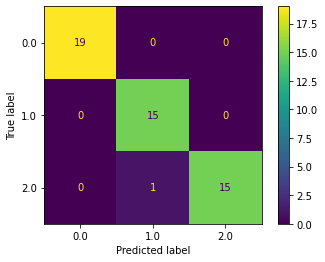

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# Dentro desta tarefa utilizamos dois dataset, então guardaremos y_test em uma outra variável para evitar confusão rode tudo sequencialmente, célula à célula (crtl + f9 para rodar tudo)

plot_confusion_matrix(clf_min_max, X_test_min_max, y_test) 

 # Trabalhando com features categóricas

## Carregando os recursos necessários

Crie um dataframe a partir do dataset "car_details", utilizando a biblioteca pandas.

In [ ]:
df = pd.read_csv("car_details.csv")

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2012,459999,87000,Diesel,Individual,Manual,First Owner,20.77,1248,88.76,200,7.0
1,BMW,2010,1100000,102000,Diesel,Dealer,Automatic,First Owner,19.62,1995,187.74,400,5.0
2,Tata,2009,229999,212000,Diesel,Individual,Manual,Third Owner,11.57,2179,138.10,320,7.0
3,Toyota,2010,800000,125000,Diesel,Individual,Manual,Second Owner,11.50,2982,171.00,343,7.0
4,Maruti,2010,180000,25000,Petrol,Individual,Manual,Second Owner,19.70,796,46.30,62,5.0


Cheque as colunas categóricas.

Dica: 
- Use o método value_counts - df["feature name"].value_counts()
- Para verificar todos possíveis valores de uma feature, utilize o método unique na coluna desejada - df["feature name"].unique()

## Simplificando categorias 

Neste dataset existem várias features com muitas categorias. Entretanto, essas categorias tem poucas instancias, então podem ser simplificadas.

### Exemplo - coluna Fuel

In [ ]:
df["fuel"].value_counts() / df.shape[0]

Diesel    0.544748
Petrol    0.444043
CNG       0.007051
LPG       0.004158
Name: fuel, dtype: float64

Como podemos ver, a categoria Diesel e Petrol correspondem a mais do que 98% do conjunto de dados, enquanto CNG e LPG representam uma quantidade ínfima de linhas deste dataframe.

Iremos então considerar tanto CNG quanto LPG como uma única nova categoria, denominada "other".

obs: é interessante ter uma classe other, pois caso aparecesse outro tipo de combustível (como carros elétricos) o nosso modelo poderia facilmente se adaptar, sem precisar ser treinado novamente.

obs2: caso esta nova classe teórica comece a ser relevante, teríamos que treinar novamente o modelo para considerar a nova representativade desta categoria.

In [ ]:
def merge_fuel(df):
  dic = {'CNG': 'Other', 'LPG': 'Other'}
  df = df.replace({'fuel': dic})
  return df

df = merge_fuel(df)

Tente fazer o mesmo para a feature owner, transformando a classe menos representativa em uma das outras que permanecerão no dataframe.

In [ ]:
df["owner"].value_counts()

First Owner             3631
Second Owner            1429
Third Owner              358
Fourth & Above Owner     111
Test Drive Car             2
Name: owner, dtype: int64

In [ ]:
def merge_owner(df):
  df = df.replace('Test Drive Car', 'First Owner')
  return df

df = merge_owner(df)

Agora com a coluna "name", também aplicaremos o mesmo processo

In [ ]:
name_count = df["name"].value_counts() / df.shape[0]
name_count

Maruti           0.297776
Hyundai          0.172663
Mahindra         0.097089
Tata             0.090942
Toyota           0.058760
Honda            0.058398
Ford             0.049177
Chevrolet        0.030555
Renault          0.029651
Volkswagen       0.023323
BMW              0.014826
Skoda            0.012837
Nissan           0.009582
Jaguar           0.009402
Datsun           0.008317
Volvo            0.007774
Mercedes-Benz    0.005966
Audi             0.005243
Fiat             0.004520
Jeep             0.004158
Lexus            0.003435
Mitsubishi       0.001627
Force            0.000904
Land             0.000723
MG               0.000542
Daewoo           0.000542
Kia              0.000542
Isuzu            0.000362
Ashok            0.000181
Ambassador       0.000181
Name: name, dtype: float64

In [ ]:
name_count[:10].sum()

0.9083348399927681

Podemos observar na coluna "name" que a representatividade dos 10 mais frequentes nomes de carros somam aproximadamente 90% de todas as classes.

Assim, iremos mesclar as categorias menos frequentes em uma única classe denominada "others".

In [ ]:
names = name_count[10:].to_dict().keys()
names

dict_keys(['BMW', 'Skoda', 'Nissan', 'Jaguar', 'Datsun', 'Volvo', 'Mercedes-Benz', 'Audi', 'Fiat', 'Jeep', 'Lexus', 'Mitsubishi', 'Force', 'Land', 'MG', 'Daewoo', 'Kia', 'Isuzu', 'Ashok', 'Ambassador'])

In [ ]:
replace_names = {key: "others" for key in names}
replace_names

{'Ambassador': 'others',
 'Ashok': 'others',
 'Audi': 'others',
 'BMW': 'others',
 'Daewoo': 'others',
 'Datsun': 'others',
 'Fiat': 'others',
 'Force': 'others',
 'Isuzu': 'others',
 'Jaguar': 'others',
 'Jeep': 'others',
 'Kia': 'others',
 'Land': 'others',
 'Lexus': 'others',
 'MG': 'others',
 'Mercedes-Benz': 'others',
 'Mitsubishi': 'others',
 'Nissan': 'others',
 'Skoda': 'others',
 'Volvo': 'others'}

In [ ]:
df.replace(replace_names, inplace=True)
df["name"].value_counts()

Maruti        1647
Hyundai        955
Mahindra       537
others         507
Tata           503
Toyota         325
Honda          323
Ford           272
Chevrolet      169
Renault        164
Volkswagen     129
Name: name, dtype: int64

## Discretizando o dataset

- One Hot Encoding: procure sobre OneHotEncoder na biblioteca sklearn
- Label encoding: procure sobre LabelEncoder na bibliote sklearn
- Target encoding: este é necessário realizar manualmente 

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2012,459999,87000,Diesel,Individual,Manual,First Owner,20.77,1248,88.76,200,7.0
1,others,2010,1100000,102000,Diesel,Dealer,Automatic,First Owner,19.62,1995,187.74,400,5.0
2,Tata,2009,229999,212000,Diesel,Individual,Manual,Third Owner,11.57,2179,138.10,320,7.0
3,Toyota,2010,800000,125000,Diesel,Individual,Manual,Second Owner,11.50,2982,171.00,343,7.0
4,Maruti,2010,180000,25000,Petrol,Individual,Manual,Second Owner,19.70,796,46.30,62,5.0


In [ ]:
one_hot_features = ["fuel", "seller_type", "transmission", "owner"]
target_encoding_features = ["name"]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoder.fit(df[one_hot_features])

df_encoded = pd.DataFrame(encoder.transform(df[one_hot_features]), columns=encoder.get_feature_names())
df_encoded.head()

,x0_Diesel,x0_Other,x0_Petrol,x1_Dealer,x1_Individual,x1_Trustmark Dealer,x2_Automatic,x2_Manual,x3_First Owner,x3_Fourth & Above Owner,x3_Second Owner,x3_Third Owner
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Removendo do dataframe original as features não encodadas

In [ ]:
df.drop(one_hot_features, axis=1, inplace=True)
df.head()

,name,year,selling_price,km_driven,mileage,engine,max_power,torque,seats
0,Maruti,2012,459999,87000,20.77,1248,88.76,200,7.0
1,others,2010,1100000,102000,19.62,1995,187.74,400,5.0
2,Tata,2009,229999,212000,11.57,2179,138.10,320,7.0
3,Toyota,2010,800000,125000,11.50,2982,171.00,343,7.0
4,Maruti,2010,180000,25000,19.70,796,46.30,62,5.0


Concatenando agora o dataframe com valores encodados e o dataframe inicial

In [ ]:
df_aux = pd.concat([df, df_encoded], axis=1)
df = df_aux
df.head()

,name,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,x0_Diesel,x0_Other,x0_Petrol,x1_Dealer,x1_Individual,x1_Trustmark Dealer,x2_Automatic,x2_Manual,x3_First Owner,x3_Fourth & Above Owner,x3_Second Owner,x3_Third Owner
0,Maruti,2012,459999,87000,20.77,1248,88.76,200,7.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,others,2010,1100000,102000,19.62,1995,187.74,400,5.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,Tata,2009,229999,212000,11.57,2179,138.10,320,7.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,Toyota,2010,800000,125000,11.50,2982,171.00,343,7.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,Maruti,2010,180000,25000,19.70,796,46.30,62,5.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Lidando com a feature "name"
Agora iremos lidar com a coluna "name", em que aplicaremos target encoding. 

Podemos utilizar o valor médio da feature "selling price" de dada categoria de carro.

Dica: procure utilizar o método groupby de pandas para facilitar o código

In [ ]:
names_with_prices = df.group by("name")["selling_price"].mean().to_dict()
names_with_prices

{'Chevrolet': 268349.08284023666,
 'Ford': 529077.1617647059,
 'Honda': 598210.9566563468,
 'Hyundai': 468352.3141361257,
 'Mahindra': 621391.0186219739,
 'Maruti': 403208.1378263509,
 'Renault': 455615.81097560975,
 'Tata': 364672.43339960236,
 'Toyota': 1019043.0215384616,
 'Volkswagen': 473480.6046511628,
 'others': 2090806.6804733728}

In [ ]:
df.replace(names_with_prices, inplace=True)
df.head()

,name,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,x0_Diesel,x0_Other,x0_Petrol,x1_Dealer,x1_Individual,x1_Trustmark Dealer,x2_Automatic,x2_Manual,x3_First Owner,x3_Fourth & Above Owner,x3_Second Owner,x3_Third Owner
0,4.032081e+05,2012,459999,87000,20.77,1248,88.76,200,7.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,2.090807e+06,2010,1100000,102000,19.62,1995,187.74,400,5.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3.646724e+05,2009,229999,212000,11.57,2179,138.10,320,7.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.019043e+06,2010,800000,125000,11.50,2982,171.00,343,7.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,4.032081e+05,2010,180000,25000,19.70,796,46.30,62,5.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Aplicando um modelo de regressão

Agora iremos aplicar um modelo de regressão (que muitos de vocês ainda não viram) para avaliar as técnicas utilizadas até então.

Não é necessário entender o que o modelo de regressão utilizado faz, mas sim os motivos pelos quais as técnicas de encoding e scaling foram utilizados no decorrer da prática.

Este modelo será explicado em uma das futuras aulas do curso.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

X = df.drop("selling_price", axis=1)
y = df["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.head()
y_train.head()

1362    1630000
4782     680000
506      795000
1417     290000
3252     310000
Name: selling_price, dtype: int64

In [ ]:
regressor = RandomForestRegressor(max_depth=5, random_state=42)

regressor.fit(X_train, y_train)

pred = regressor.predict(X_test)

r2_score(pred, y_test)

0.938692739955227

In [ ]:
regressor.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)>

## Otimizando os hiperparâmetros

Buscaremos agora com o gridsearch buscar hiperparâmetros que melhoram nossos modelos.

obs: hiperparâmetros correspondem a valores que são alterados no modelo, por exemplo no algoritmo KNN, o número de vizinhos era o hiperparâmetro do modelo. 

obs: realizar a otimização requer um tempo, uma vez que são testadas cada combinação de hiperparâmetro. Neste caso, cada hiperparâmetro terá apenas dois valores para não demorar tanto, totalizando 2 x 2 x 2 = 8 diferentes modelos.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': np.arange(10,50,5),
    'random_state': [42],
}

# Create a based model
regressor = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(regressor, param_grid=param_grid, cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   20.4s finished


{'max_depth': 15, 'random_state': 42}

In [ ]:
regressor = RandomForestRegressor(**grid_search.best_params_)

regressor.fit(X_train, y_train)

pred = regressor.predict(X_test)

r2_score(pred, y_test)

0.9672806401280654